In [2]:
"""
This code is used to create a initial condition of a higher resolution simulation from the initial condition of a lower resolution run. 
"""

'\nThis code is used to create a initial condition of a higher resolution simulation from the initial condition of a lower resolution run. \n'

In [3]:

import numpy as np
from scipy.fft import rfftn, irfftn,fftn,fftfreq,ifftn
import pathlib
import matplotlib.pyplot as plt

In [4]:
N = 128
N2 = 256

In [5]:
kx2 = ky2 = kz2 = fftfreq(N2,1./N2)
kz2 = np.abs(kz2[N2//2 +1 ])
cond_k = np.abs(np.round(kx2))<= N//3
cond_kx = (kx2 <= N//2 -1)*(kx2 >= -N//2 )

In [6]:
def load_trunc(x, N,cond_k,N2, x1):
    Nf = N2//2 + 1 
    x1[...,cond_k,:x.shape[-1]] = x.copy()*(N2/N)**2
    return x1


In [7]:
u_temp = np.zeros((3,N,N2,N2//2 + 1),dtype = np.complex128)
load_num_slabs = 32
data_per_rank = N//load_num_slabs
rank_data = range(0,N) # The rank contains these slices 
slab_old = np.inf
paths = pathlib.Path(f"/mnt/pfs/rajarshi.chattopadhyay/codes/HIT_3D/data/forced_True/N_128_Re_78.7/time_20.0")
for lidx,j in enumerate(rank_data):
    slab = j//data_per_rank
    idx = j%data_per_rank
    
    
    """Loading the truncated data"""
    if slab_old != slab:  Field = np.load(paths/f"Fields_cmp_{slab}.npz")
    slab_old = slab
    u_temp[0,lidx] = load_trunc(Field['u'][idx],N,cond_k,N2,u_temp[0,lidx])
    u_temp[1,lidx] = load_trunc(Field['v'][idx],N,cond_k,N2,u_temp[0,lidx])
    u_temp[2,lidx] = load_trunc(Field['w'][idx],N,cond_k,N2,u_temp[0,lidx])
u_small = irfftn(u_temp,(N,N),axes = (-2,-1))

In [8]:
uk = np.zeros((3,N2,N2,N2//2 +1 ),dtype= np.complex128)
uk[...,cond_kx,:,:] = fftn(u_temp, axes = (-3))*(N2/N)
u = fftn(u_temp,axes = (-3))
u_big = irfftn(u,(N2,N2,N2),axes = (-3,-2,-1))
u_temp = ifftn(u, axes = (-3))[...,cond_k, :N2//3+1]

# for rank in range(N2):
    
#     np.savez_compressed(f"{new_dir}/Fields_cmp_{rank}",u = u_temp[0],v = u_temp[1],w = u_temp[2])

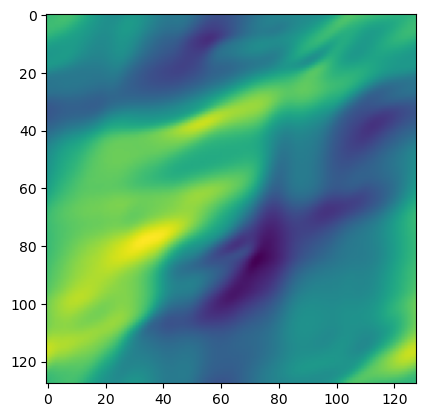

In [11]:
plt.imshow(u_small[0,1])

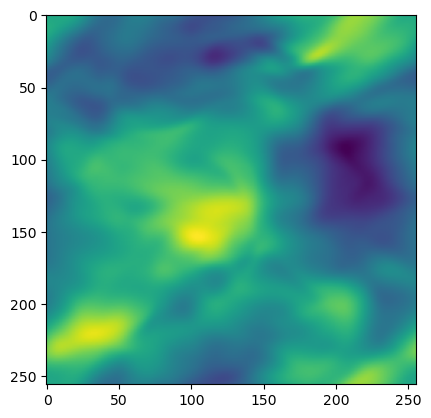

In [13]:
plt.imshow(u_big[0,1])
